In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Pretendard' 
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_parquet('../../data/통합_train_데이터.parquet')

In [9]:
#✅ 피처 목록 (정제된 승인매출 피처들, 중복 제거 반영)
filtered_features = [
    '이용건수_신용_B0M',
    '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M',
    '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'  # 범주형
]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. 입력 피처 (중복 제거된 승인매출 피처 기준)
X = df_train[filtered_features].copy()

# 2. 범주형 처리 ('이용금액대')
le_amt = LabelEncoder()
X['이용금액대'] = le_amt.fit_transform(X['이용금액대'].astype(str))

# 3. 타겟 인코딩 ('segment')
le_seg = LabelEncoder()
y = le_seg.fit_transform(df_train['Segment'])

# 4. train/valid 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#  모델 불러오기
with open("models/try__model.pkl", "rb") as f:
    model = pickle.load(f)

# segment 컬럼으로 다시 학습
le_seg = LabelEncoder()
le_seg.fit(df_train['Segment'])  # → 'A', 'B', ..., 'E' 순서를 기억함

# 예측
y_pred = model.predict(X_valid)
y_pred_label = le_seg.inverse_transform(y_pred)

# 4. 결과 확인
print(y_pred_label[:10])

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [16:01:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


['D' 'E' 'E' 'E' 'D' 'C' 'E' 'E' 'E' 'E']


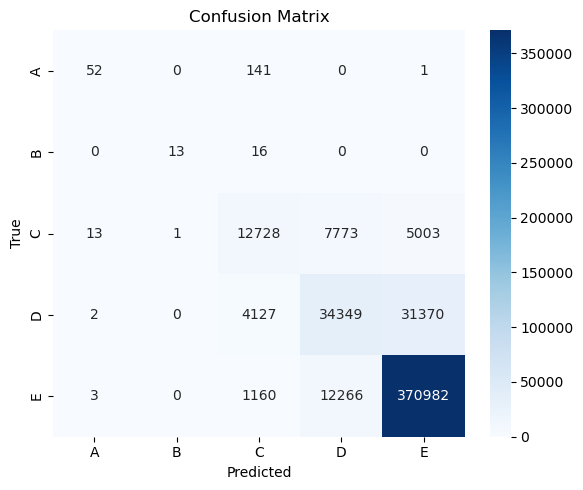

✅ 분류 성능 리포트:
              precision    recall  f1-score        support
A              0.742857  0.268041  0.393939     194.000000
B              0.928571  0.448276  0.604651      29.000000
C              0.700418  0.498785  0.582650   25518.000000
D              0.631555  0.491768  0.552964   69848.000000
E              0.910707  0.965066  0.937099  384411.000000
accuracy       0.871092  0.871092  0.871092       0.871092
macro avg      0.782822  0.534387  0.614261  480000.000000
weighted avg   0.858840  0.871092  0.862118  480000.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ✅ confusion matrix 생성
conf_matrix = confusion_matrix(y_valid, y_pred)
labels = le_seg.classes_  # ['A', 'B', 'C', 'D', 'E']

# ✅ confusion matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ✅ classification report 출력
report = classification_report(y_valid, y_pred, target_names=labels, output_dict=True)

# 보기 좋게 DataFrame으로 변환
report_df = pd.DataFrame(report).T
print("✅ 분류 성능 리포트:")
print(report_df)


In [17]:
from sklearn.metrics import f1_score

# 기존 예측: y_valid, y_pred
f1_micro = f1_score(y_valid, y_pred, average='micro')

print(f"✅ Micro F1 Score: {f1_micro:.4f}")

✅ Micro F1 Score: 0.8711


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 중요도 값 추출
importances = model.feature_importances_
feature_names = X_train.columns  # 또는 X_valid.columns

# 중요도 정렬
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

C:\Users\somee\AppData\Local\Temp\ipykernel_21532\2240186893.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Pretendard.
  plt.tight_layout()
c:\Users\somee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Pretendard.
  fig.canvas.print_figure(bytes_io, **kw)


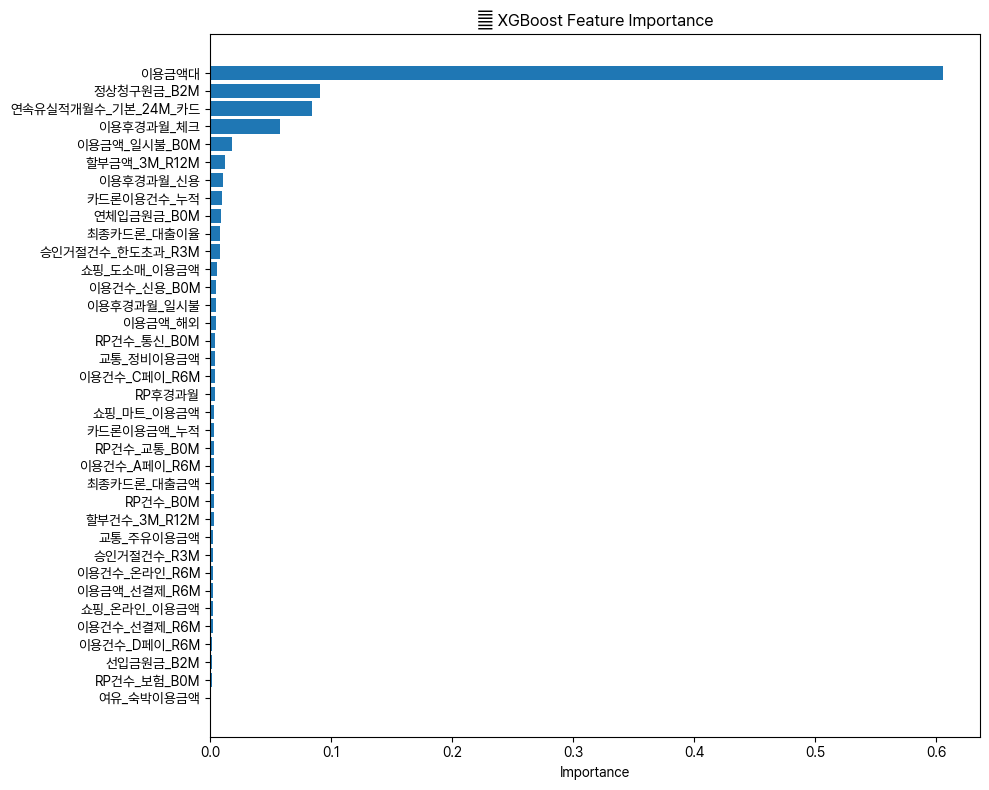

In [20]:
# 시각화
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.title("🔍 XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_21532\1945749022.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Pretendard.
  plt.tight_layout()


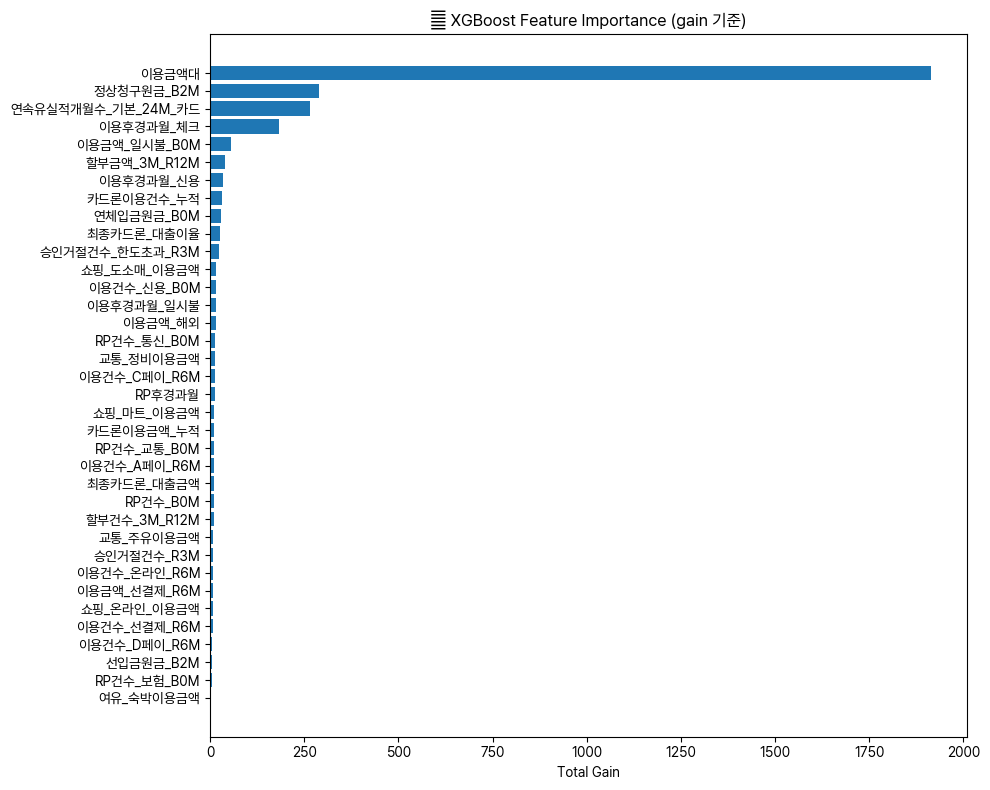

In [21]:
import matplotlib.pyplot as plt

# gain 기반 중요도 딕셔너리로 추출
gain_dict = model.get_booster().get_score(importance_type='gain')

# 딕셔너리를 정렬된 리스트로 변환
sorted_gain = sorted(gain_dict.items(), key=lambda x: x[1], reverse=True)

# 분리
feature_names = [x[0] for x in sorted_gain]
importances = [x[1] for x in sorted_gain]

# 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.title("🔍 XGBoost Feature Importance (gain 기준)")
plt.xlabel("Total Gain")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# gain 기준 중요도 가져오기
gain_dict = model.get_booster().get_score(importance_type='gain')

# 정렬 및 상위 N개만 보기
sorted_gain = sorted(gain_dict.items(), key=lambda x: x[1], reverse=True)
top_gain_features = pd.DataFrame(sorted_gain, columns=['Feature', 'Gain']).head(20)

print(top_gain_features)

               Feature         Gain
0                이용금액대  1912.747803
1           정상청구원금_B2M   288.196014
2   연속유실적개월수_기본_24M_카드   265.993683
3            이용후경과월_체크   183.596359
4         이용금액_일시불_B0M    57.065868
5         할부금액_3M_R12M    38.666039
6            이용후경과월_신용    34.771385
7           카드론이용건수_누적    30.860254
8           연체입금원금_B0M    30.048506
9           최종카드론_대출이율    26.135660
10     승인거절건수_한도초과_R3M    25.200508
11         쇼핑_도소매_이용금액    17.274441
12         이용건수_신용_B0M    16.804010
13          이용후경과월_일시불    16.487602
14             이용금액_해외    15.605518
15         RP건수_통신_B0M    14.367209
16           교통_정비이용금액    14.175411
17        이용건수_C페이_R6M    13.149241
18              RP후경과월    12.115031
19          쇼핑_마트_이용금액    11.673454


### SHAP

 98%|===================| 2444/2500 [00:27<00:00]        

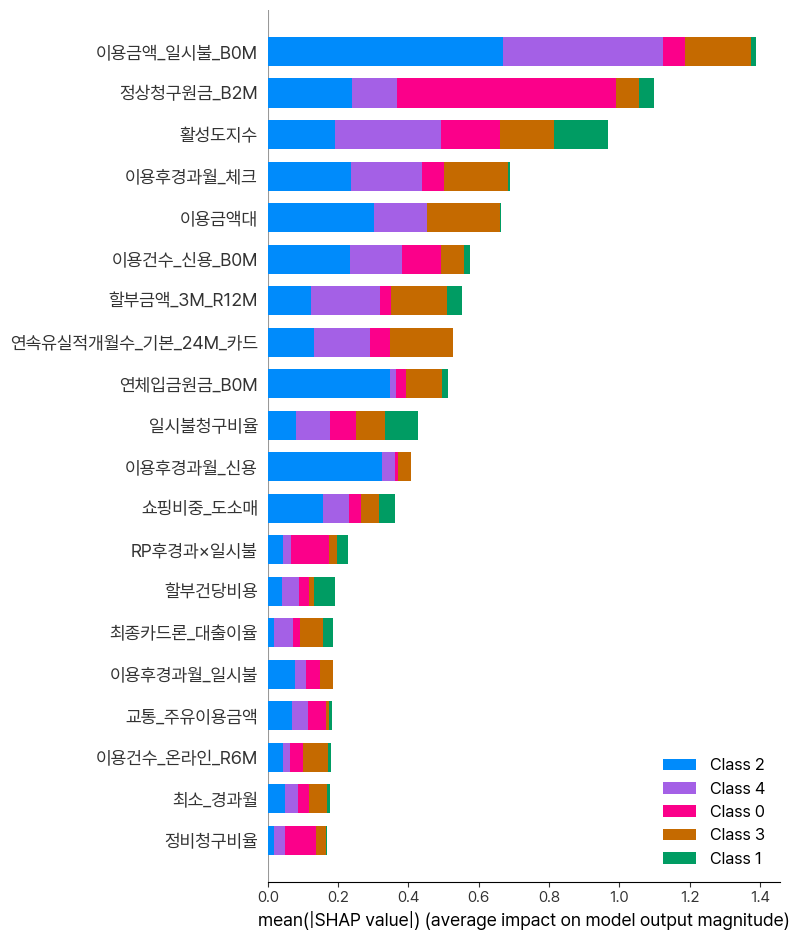

In [77]:
import shap

# Tree 기반 explainer 생성
explainer = shap.Explainer(model, X_train)

# 샘플 500개만 사용 (속도 개선)
X_sample = X_valid.sample(n=500, random_state=42)
shap_values = explainer(X_sample)

# summary_plot (방향성 포함)
shap.summary_plot(shap_values, X_sample, plot_type="bar")


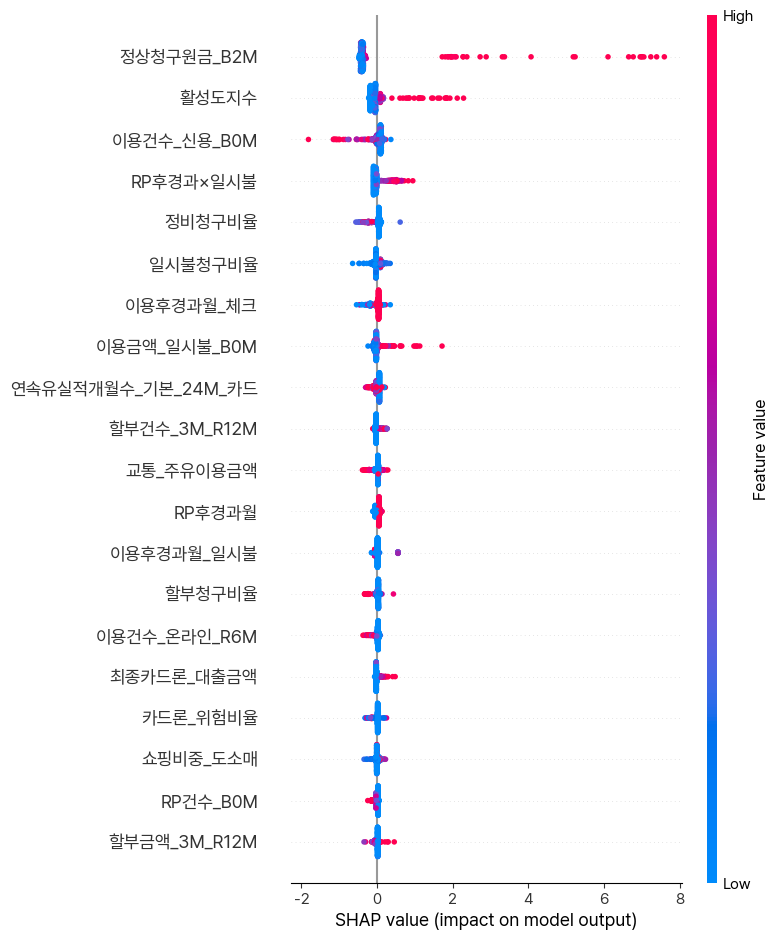

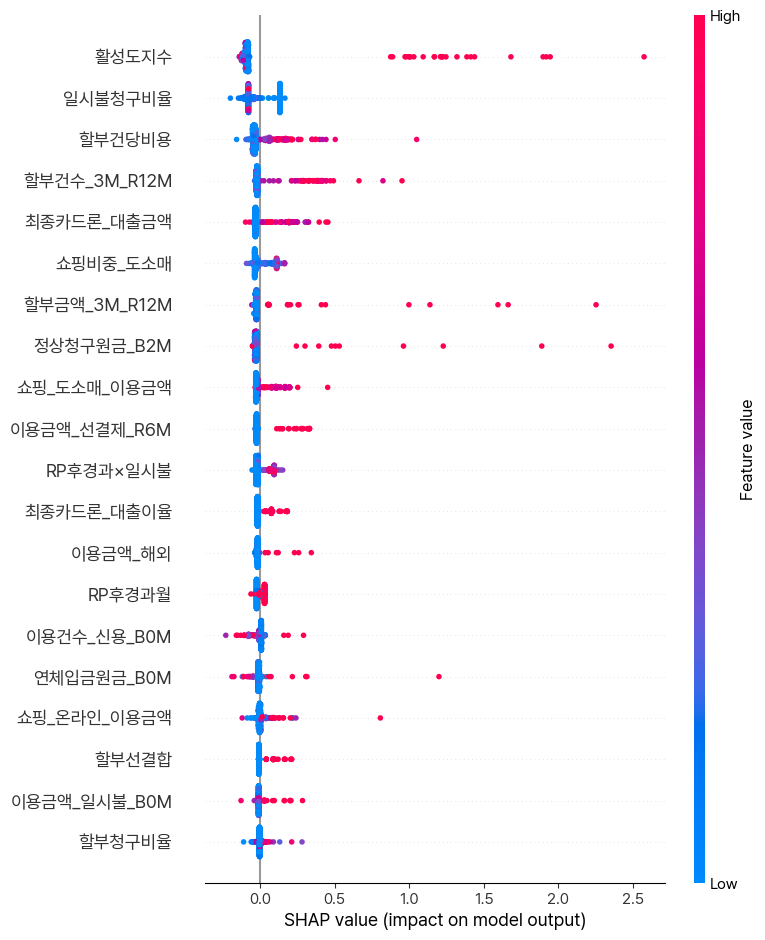

In [78]:
# A = 0, B = 1
shap.summary_plot(shap_values[:, :, 0], X_sample, plot_type='dot', class_names='Segment A')
shap.summary_plot(shap_values[:, :, 1], X_sample, plot_type='dot', class_names='Segment B')

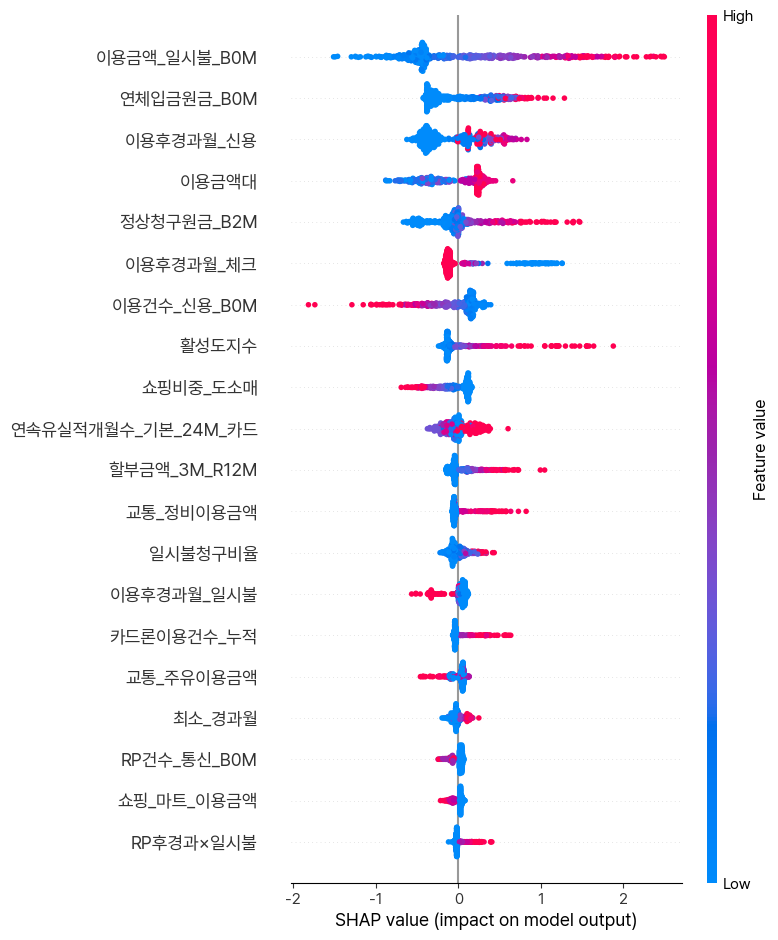

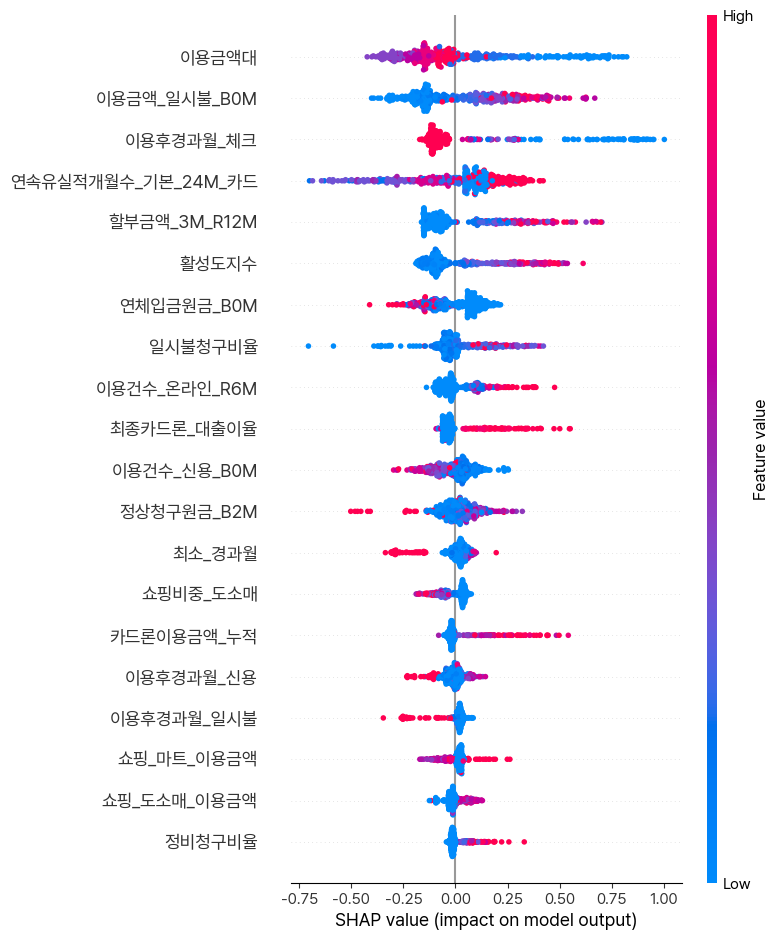

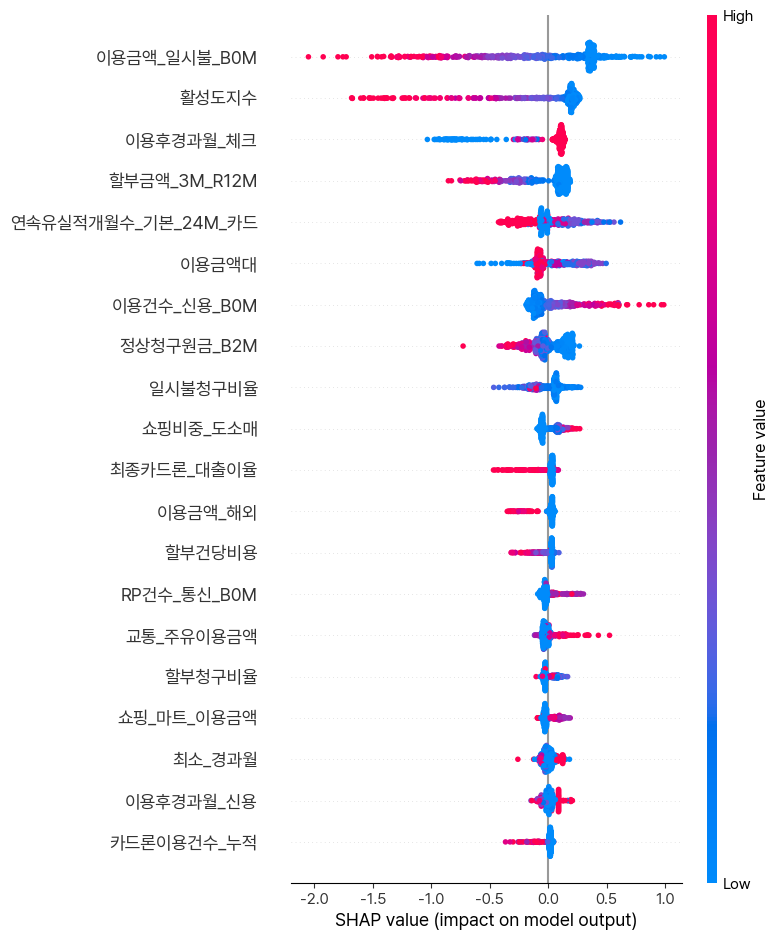

In [79]:
for i, name in zip([2, 3, 4], ['Segment C', 'Segment D', 'Segment E']):
    shap.summary_plot(shap_values[:, :, i], X_sample, plot_type='dot', class_names=name)

In [80]:
shap_values = explainer(X_sample)  # shape = (n_samples, n_features, n_classes)

 97%|=================== | 2423/2500 [00:27<00:00]       

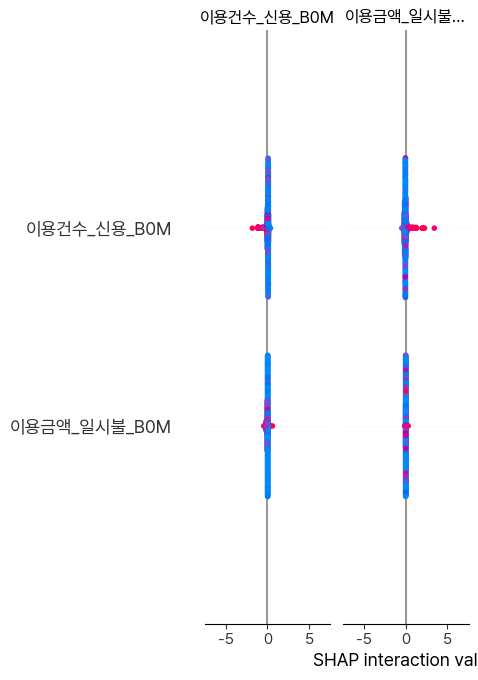

In [81]:
# 4. Segment A-B (Class 0, 1) 요약
shap.summary_plot(shap_values[:, :, [0, 1]], X_sample, plot_type="dot")

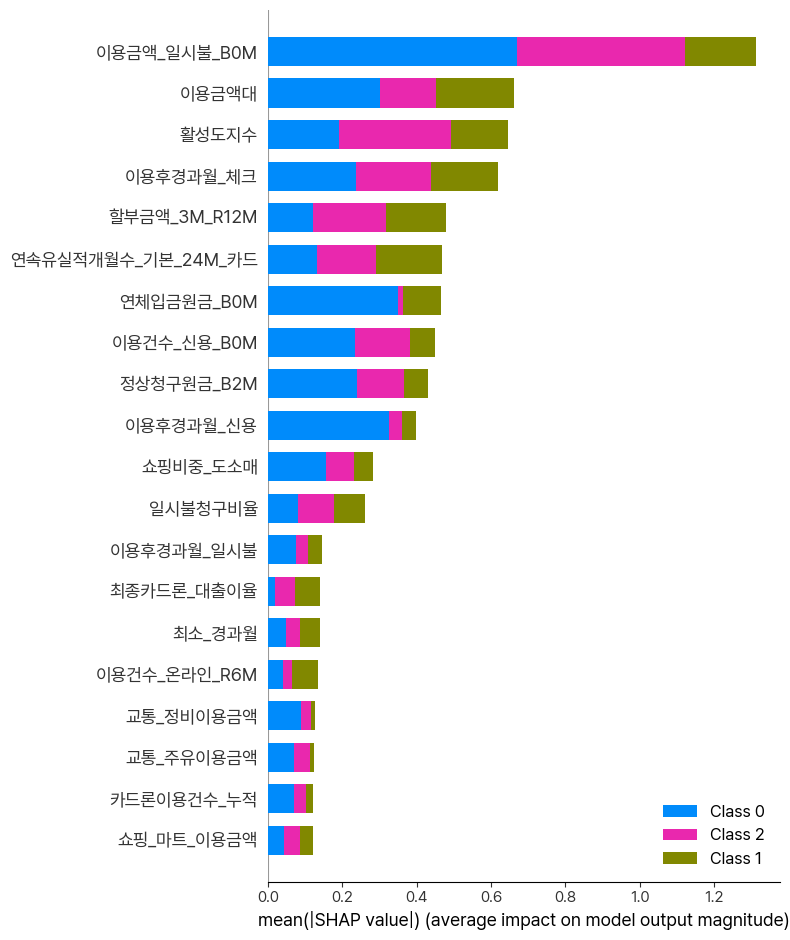

In [82]:
# 5. Segment C-E (Class 2, 3, 4) 요약
shap.summary_plot(shap_values[:, :, [2, 3, 4]], X_sample, plot_type="bar")

In [83]:
import shap

explainer = shap.TreeExplainer(model)
shap_inter = explainer.shap_interaction_values(X_sample)

In [84]:
# 2. 샘플 추출
X_sample = X_valid.sample(n=300, random_state=42)

# 3. SHAP interaction 값 계산
shap_inter = explainer.shap_interaction_values(X_sample)  # shape: [n_samples, n_features, n_features, n_classes]

# 4. 특정 클래스만 선택 (예: Segment A = Class 0)
interaction_matrix = np.abs(shap_inter[:, :, :, 0]).mean(axis=0)

# 5. 대각선 제거
np.fill_diagonal(interaction_matrix, 0)

# 6. 피처 이름 매핑
feature_names = X_sample.columns.tolist()

# 7. 상위 상호작용쌍 추출
interaction_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        interaction_pairs.append((
            feature_names[i],
            feature_names[j],
            interaction_matrix[i, j]
        ))

# 8. 정렬 후 DataFrame 생성
top_interactions = sorted(interaction_pairs, key=lambda x: x[2], reverse=True)[:20]
top_inter_df = pd.DataFrame(top_interactions, columns=['Feature 1', 'Feature 2', 'Mean Interaction (|SHAP|)'])

# 9. 출력
print("✅ SHAP 상호작용 (Segment A 기준) 상위 20쌍:")
print(top_inter_df)


✅ SHAP 상호작용 (Segment A 기준) 상위 20쌍:
             Feature 1           Feature 2  Mean Interaction (|SHAP|)
0         이용금액_일시불_B0M          정상청구원금_B2M                   0.198449
1          이용건수_신용_B0M          정상청구원금_B2M                   0.154993
2           정상청구원금_B2M             일시불청구비율                   0.127541
3         이용금액_일시불_B0M               활성도지수                   0.070312
4            이용후경과월_신용               활성도지수                   0.067858
5         이용금액_일시불_B0M           교통_주유이용금액                   0.060356
6           정상청구원금_B2M               활성도지수                   0.057458
7         이용금액_일시불_B0M         쇼핑_도소매_이용금액                   0.052414
8           정상청구원금_B2M  연속유실적개월수_기본_24M_카드                   0.046992
9          이용건수_신용_B0M             일시불청구비율                   0.043019
10         이용건수_신용_B0M        이용금액_일시불_B0M                   0.041839
11        이용금액_일시불_B0M          연체입금원금_B0M                   0.040880
12         이용건수_신용_B0M           교통_주유이용금액             

In [85]:
# 2. 샘플 추출
X_sample = X_valid.sample(n=300, random_state=42)

# 3. SHAP interaction 값 계산
shap_inter = explainer.shap_interaction_values(X_sample)  # shape: [n_samples, n_features, n_features, n_classes]

# 4. 특정 클래스만 선택 (예: Segment A = Class 0)
interaction_matrix = np.abs(shap_inter[:, :, :, 1]).mean(axis=0)

# 5. 대각선 제거
np.fill_diagonal(interaction_matrix, 0)

# 6. 피처 이름 매핑
feature_names = X_sample.columns.tolist()

# 7. 상위 상호작용쌍 추출
interaction_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        interaction_pairs.append((
            feature_names[i],
            feature_names[j],
            interaction_matrix[i, j]
        ))

# 8. 정렬 후 DataFrame 생성
top_interactions = sorted(interaction_pairs, key=lambda x: x[2], reverse=True)[:20]
top_inter_df = pd.DataFrame(top_interactions, columns=['Feature 1', 'Feature 2', 'Mean Interaction (|SHAP|)'])

# 9. 출력
print("✅ SHAP 상호작용 (Segment B 기준) 상위 20쌍:")
print(top_inter_df)


✅ SHAP 상호작용 (Segment B 기준) 상위 20쌍:
       Feature 1     Feature 2  Mean Interaction (|SHAP|)
0   할부금액_3M_R12M         활성도지수                   0.145159
1          활성도지수        할부건당비용                   0.118992
2    쇼핑_온라인_이용금액  할부금액_3M_R12M                   0.103720
3   할부건수_3M_R12M         활성도지수                   0.097018
4    쇼핑_온라인_이용금액         활성도지수                   0.083619
5   이용금액_일시불_B0M         활성도지수                   0.080587
6     연체입금원금_B0M         활성도지수                   0.065200
7   할부금액_3M_R12M    정상청구원금_B2M                   0.061030
8   할부건수_3M_R12M    정상청구원금_B2M                   0.060855
9     정상청구원금_B2M        할부건당비용                   0.056293
10    연체입금원금_B0M        할부건당비용                   0.052156
11  할부건수_3M_R12M    연체입금원금_B0M                   0.042196
12         활성도지수        할부청구비율                   0.041478
13  이용금액_일시불_B0M        할부건당비용                   0.038471
14   이용건수_신용_B0M   쇼핑_도소매_이용금액                   0.038171
15     선입금원금_B2M         활성도지수       

In [86]:
# 2. 샘플 추출
X_sample = X_valid.sample(n=300, random_state=42)

# 3. SHAP interaction 값 계산
shap_inter = explainer.shap_interaction_values(X_sample)  # shape: [n_samples, n_features, n_features, n_classes]

# 4. 특정 클래스만 선택 (예: Segment A = Class 0)
interaction_matrix = np.abs(shap_inter[:, :, :, 2]).mean(axis=0)

# 5. 대각선 제거
np.fill_diagonal(interaction_matrix, 0)

# 6. 피처 이름 매핑
feature_names = X_sample.columns.tolist()

# 7. 상위 상호작용쌍 추출
interaction_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        interaction_pairs.append((
            feature_names[i],
            feature_names[j],
            interaction_matrix[i, j]
        ))

# 8. 정렬 후 DataFrame 생성
top_interactions = sorted(interaction_pairs, key=lambda x: x[2], reverse=True)[:20]
top_inter_df = pd.DataFrame(top_interactions, columns=['Feature 1', 'Feature 2', 'Mean Interaction (|SHAP|)'])

# 9. 출력
print("✅ SHAP 상호작용 (Segment C 기준) 상위 20쌍:")
print(top_inter_df)


✅ SHAP 상호작용 (Segment C 기준) 상위 20쌍:
             Feature 1           Feature 2  Mean Interaction (|SHAP|)
0         이용금액_일시불_B0M               이용금액대                   0.245835
1         이용금액_일시불_B0M  연속유실적개월수_기본_24M_카드                   0.066053
2         이용금액_일시불_B0M             일시불청구비율                   0.046803
3         이용금액_일시불_B0M           교통_주유이용금액                   0.043756
4          이용건수_신용_B0M        이용금액_일시불_B0M                   0.040181
5         이용금액_일시불_B0M               활성도지수                   0.039628
6         이용금액_일시불_B0M          연체입금원금_B0M                   0.037863
7           정상청구원금_B2M               활성도지수                   0.037053
8            이용후경과월_신용          정상청구원금_B2M                   0.034786
9           연체입금원금_B0M          정상청구원금_B2M                   0.032576
10        이용금액_일시불_B0M          정상청구원금_B2M                   0.029204
11  연속유실적개월수_기본_24M_카드               이용금액대                   0.028577
12        이용금액_일시불_B0M              최소_경과월             

In [87]:
# 2. 샘플 추출
X_sample = X_valid.sample(n=300, random_state=42)

# 3. SHAP interaction 값 계산
shap_inter = explainer.shap_interaction_values(X_sample)  # shape: [n_samples, n_features, n_features, n_classes]

# 4. 특정 클래스만 선택 (예: Segment A = Class 0)
interaction_matrix = np.abs(shap_inter[:, :, :, 3]).mean(axis=0)

# 5. 대각선 제거
np.fill_diagonal(interaction_matrix, 0)

# 6. 피처 이름 매핑
feature_names = X_sample.columns.tolist()

# 7. 상위 상호작용쌍 추출
interaction_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        interaction_pairs.append((
            feature_names[i],
            feature_names[j],
            interaction_matrix[i, j]
        ))

# 8. 정렬 후 DataFrame 생성
top_interactions = sorted(interaction_pairs, key=lambda x: x[2], reverse=True)[:20]
top_inter_df = pd.DataFrame(top_interactions, columns=['Feature 1', 'Feature 2', 'Mean Interaction (|SHAP|)'])

# 9. 출력
print("✅ SHAP 상호작용 (Segment D 기준) 상위 20쌍:")
print(top_inter_df)

✅ SHAP 상호작용 (Segment D 기준) 상위 20쌍:
             Feature 1           Feature 2  Mean Interaction (|SHAP|)
0                이용금액대               활성도지수                   0.082377
1   연속유실적개월수_기본_24M_카드               활성도지수                   0.046908
2   연속유실적개월수_기본_24M_카드               이용금액대                   0.041110
3            이용후경과월_체크               이용금액대                   0.027787
4            이용후경과월_체크               활성도지수                   0.026741
5         이용금액_일시불_B0M  연속유실적개월수_기본_24M_카드                   0.025166
6           정상청구원금_B2M  연속유실적개월수_기본_24M_카드                   0.020270
7         할부금액_3M_R12M               이용금액대                   0.019492
8         이용금액_일시불_B0M               이용금액대                   0.018949
9         이용금액_일시불_B0M          연체입금원금_B0M                   0.018914
10           이용후경과월_체크  연속유실적개월수_기본_24M_카드                   0.017179
11          정상청구원금_B2M               활성도지수                   0.016662
12  연속유실적개월수_기본_24M_카드             일시불청구비율             

In [88]:
# 2. 샘플 추출
X_sample = X_valid.sample(n=300, random_state=42)

# 3. SHAP interaction 값 계산
shap_inter = explainer.shap_interaction_values(X_sample)  # shape: [n_samples, n_features, n_features, n_classes]

# 4. 특정 클래스만 선택 (예: Segment A = Class 0)
interaction_matrix = np.abs(shap_inter[:, :, :, 4]).mean(axis=0)

# 5. 대각선 제거
np.fill_diagonal(interaction_matrix, 0)

# 6. 피처 이름 매핑
feature_names = X_sample.columns.tolist()

# 7. 상위 상호작용쌍 추출
interaction_pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        interaction_pairs.append((
            feature_names[i],
            feature_names[j],
            interaction_matrix[i, j]
        ))

# 8. 정렬 후 DataFrame 생성
top_interactions = sorted(interaction_pairs, key=lambda x: x[2], reverse=True)[:20]
top_inter_df = pd.DataFrame(top_interactions, columns=['Feature 1', 'Feature 2', 'Mean Interaction (|SHAP|)'])

# 9. 출력
print("✅ SHAP 상호작용 (Segment E 기준) 상위 20쌍:")
print(top_inter_df)


✅ SHAP 상호작용 (Segment E 기준) 상위 20쌍:
             Feature 1           Feature 2  Mean Interaction (|SHAP|)
0         이용금액_일시불_B0M               이용금액대                   0.103024
1         이용금액_일시불_B0M  연속유실적개월수_기본_24M_카드                   0.050608
2                이용금액대               활성도지수                   0.049803
3         이용금액_일시불_B0M             일시불청구비율                   0.027724
4         할부금액_3M_R12M              할부건당비용                   0.025061
5         이용금액_일시불_B0M          정상청구원금_B2M                   0.024083
6              일시불청구비율               활성도지수                   0.021679
7           정상청구원금_B2M               활성도지수                   0.019800
8   연속유실적개월수_기본_24M_카드               이용금액대                   0.019530
9   연속유실적개월수_기본_24M_카드               활성도지수                   0.017177
10        할부금액_3M_R12M               이용금액대                   0.017137
11         RP건수_통신_B0M  연속유실적개월수_기본_24M_카드                   0.016717
12               이용금액대            쇼핑비중_도소매             

In [89]:
# ✅ df_train에 파생변수 추가
df_train['일시불청구비율'] = df_train['이용금액_일시불_B0M'] / (df_train['정상청구원금_B2M'] + 1)
df_train['활성도지수'] = df_train['정상청구원금_B2M'] * df_train['연속유실적개월수_기본_24M_카드']
df_train['RP후경과×일시불'] = df_train['RP후경과월'] * df_train['이용금액_일시불_B0M']
df_train['최소_경과월'] = df_train[['이용후경과월_체크', '이용후경과월_신용']].min(axis=1)
df_train['카드론_위험비율'] = df_train['카드론이용건수_누적'] / (df_train['정상청구원금_B2M'] + 1)

# Segment B 중심
df_train['할부청구비율'] = df_train['할부금액_3M_R12M'] / (df_train['정상청구원금_B2M'] + 1)
df_train['할부건당비용'] = df_train['할부금액_3M_R12M'] / (df_train['할부건수_3M_R12M'] + 1)
df_train['쇼핑비중_도소매'] = df_train['쇼핑_도소매_이용금액'] / (df_train['정상청구원금_B2M'] + 1)
df_train['정비청구비율'] = df_train['교통_정비이용금액'] / (df_train['정상청구원금_B2M'] + 1)
df_train['할부선결합'] = df_train['할부금액_3M_R12M'] * df_train['이용금액_선결제_R6M']

In [90]:
# 기존 피처 + 파생 피처 통합
original_features = filtered_features
derived_features = [
    '일시불청구비율', '활성도지수', 'RP후경과×일시불', '최소_경과월', '카드론_위험비율',
    '할부청구비율', '할부건당비용', '쇼핑비중_도소매', '정비청구비율', '할부선결합'
]
all_features = original_features + derived_features

In [91]:
print(df_train['이용금액대'].dtype)


int32


In [92]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 입력/타겟
X = df_train[all_features].copy()
le = LabelEncoder()
y = le.fit_transform(df_train['Segment'])

# 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 문자형을 수치형으로 변환
le_amt = LabelEncoder()
df_train['이용금액대'] = le_amt.fit_transform(df_train['이용금액대'].astype(str))

# 모델 학습
model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', eval_metric='mlogloss')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred, target_names=le.classes_))

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:14:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:14:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [17:14:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.n

              precision    recall  f1-score   support

           A       0.75      0.27      0.40       194
           B       0.82      0.31      0.45        29
           C       0.70      0.50      0.58     25518
           D       0.63      0.49      0.55     69848
           E       0.91      0.97      0.94    384411

    accuracy                           0.87    480000
   macro avg       0.76      0.51      0.58    480000
weighted avg       0.86      0.87      0.86    480000



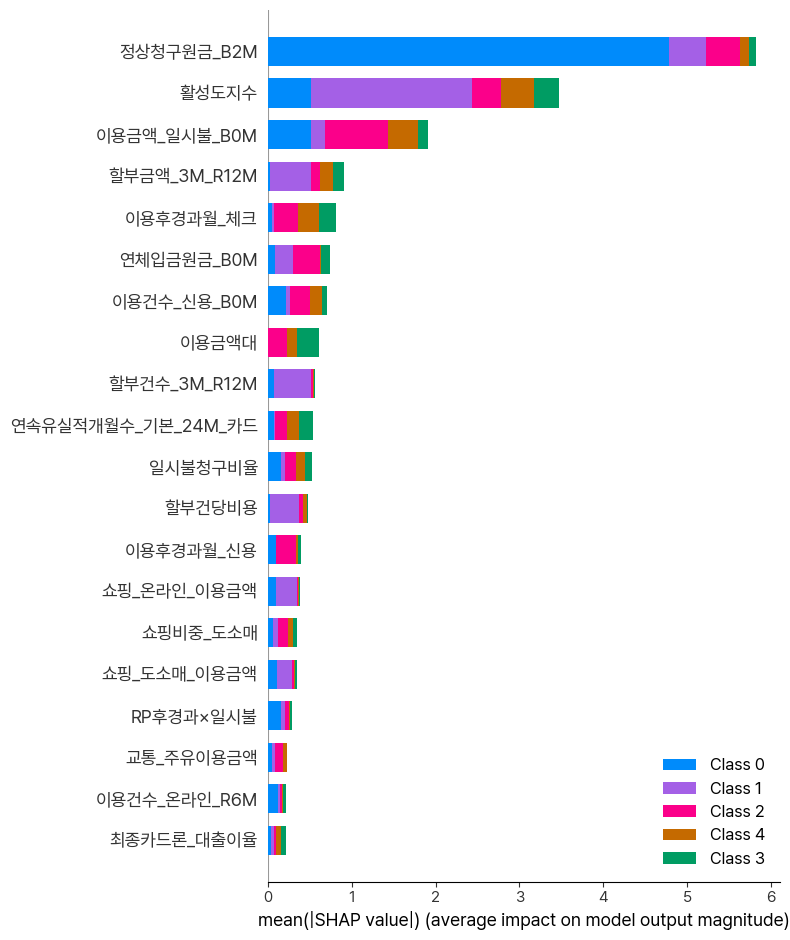

In [93]:
import shap

# 안전한 tree 전용 explainer 사용
explainer = shap.TreeExplainer(model)

# 검증 데이터에서 500개 샘플 추출
X_sample = X_valid.sample(500, random_state=42)

# SHAP 값 계산
shap_values = explainer.shap_values(X_sample)

# bar plot: 전체 평균 영향력
shap.summary_plot(shap_values, X_sample, plot_type='bar')


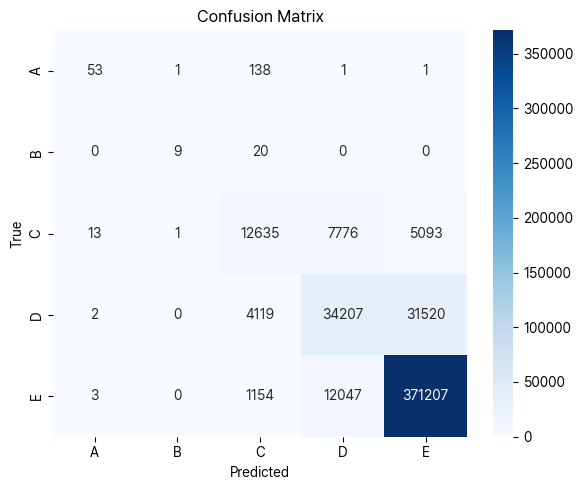

✅ 분류 성능 리포트:
              precision    recall  f1-score        support
A              0.746479  0.273196  0.400000     194.000000
B              0.818182  0.310345  0.450000      29.000000
C              0.699380  0.495141  0.579800   25518.000000
D              0.633100  0.489735  0.552265   69848.000000
E              0.910220  0.965651  0.937117  384411.000000
accuracy       0.871065  0.871065  0.871065       0.871065
macro avg      0.761472  0.506814  0.583836  480000.000000
weighted avg   0.858614  0.871065  0.861872  480000.000000


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# ✅ confusion matrix 생성
conf_matrix = confusion_matrix(y_valid, y_pred)
labels = le_seg.classes_  # ['A', 'B', 'C', 'D', 'E']

# ✅ confusion matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# ✅ classification report 출력
report = classification_report(y_valid, y_pred, target_names=labels, output_dict=True)

# 보기 좋게 DataFrame으로 변환
report_df = pd.DataFrame(report).T
print("✅ 분류 성능 리포트:")
print(report_df)


In [95]:
print(np.array(shap_values).shape)

(500, 46, 5)


In [96]:
# Segment A (클래스 0)만 추출 → shape: (500, 46)
shap_values_a = np.array(shap_values)[:, :, 0]

In [97]:
df_shap = pd.DataFrame(shap_values_a, columns=X_sample.columns)

# 파생변수 영향력 확인
mean_abs_shap = df_shap[derived_features].abs().mean().sort_values(ascending=False)

# 결과 출력
print("✅ Segment A 기준 SHAP 영향력 (파생변수):")
print(mean_abs_shap)

✅ Segment A 기준 SHAP 영향력 (파생변수):
활성도지수        0.516453
일시불청구비율      0.162880
RP후경과×일시불    0.157084
정비청구비율       0.073293
쇼핑비중_도소매     0.062321
할부청구비율       0.057447
카드론_위험비율     0.031819
최소_경과월       0.030454
할부건당비용       0.029848
할부선결합        0.015403
dtype: float32


In [98]:
shap_values_a = np.array(shap_values)[:, :, 1]

df_shap = pd.DataFrame(shap_values_a, columns=X_sample.columns)

# 파생변수 영향력 확인
mean_abs_shap = df_shap[derived_features].abs().mean().sort_values(ascending=False)

# 결과 출력
print("✅ Segment B 기준 SHAP 영향력 (파생변수):")
print(mean_abs_shap)

✅ Segment B 기준 SHAP 영향력 (파생변수):
활성도지수        1.921826
할부건당비용       0.344992
할부선결합        0.073330
할부청구비율       0.068204
쇼핑비중_도소매     0.058370
RP후경과×일시불    0.049729
일시불청구비율      0.037327
정비청구비율       0.024636
카드론_위험비율     0.008104
최소_경과월       0.005959
dtype: float32


In [99]:
shap_values_a = np.array(shap_values)[:, :, 2]

df_shap = pd.DataFrame(shap_values_a, columns=X_sample.columns)

# 파생변수 영향력 확인
mean_abs_shap = df_shap[derived_features].abs().mean().sort_values(ascending=False)

# 결과 출력
print("✅ Segment C 기준 SHAP 영향력 (파생변수):")
print(mean_abs_shap)

✅ Segment C 기준 SHAP 영향력 (파생변수):
활성도지수        0.344186
일시불청구비율      0.134339
쇼핑비중_도소매     0.119694
RP후경과×일시불    0.044487
할부건당비용       0.043174
카드론_위험비율     0.040709
최소_경과월       0.031294
할부청구비율       0.016297
정비청구비율       0.015620
할부선결합        0.003911
dtype: float32


In [100]:
shap_values_a = np.array(shap_values)[:, :, 3]

df_shap = pd.DataFrame(shap_values_a, columns=X_sample.columns)

# 파생변수 영향력 확인
mean_abs_shap = df_shap[derived_features].abs().mean().sort_values(ascending=False)

# 결과 출력
print("✅ Segment D 기준 SHAP 영향력 (파생변수):")
print(mean_abs_shap)

✅ Segment D 기준 SHAP 영향력 (파생변수):
활성도지수        0.300297
일시불청구비율      0.076820
최소_경과월       0.051332
쇼핑비중_도소매     0.048665
정비청구비율       0.028621
RP후경과×일시불    0.016038
할부건당비용       0.013046
카드론_위험비율     0.009135
할부청구비율       0.008409
할부선결합        0.005754
dtype: float32


In [101]:
shap_values_a = np.array(shap_values)[:, :, 4]

df_shap = pd.DataFrame(shap_values_a, columns=X_sample.columns)

# 파생변수 영향력 확인
mean_abs_shap = df_shap[derived_features].abs().mean().sort_values(ascending=False)

# 결과 출력
print("✅ Segment E 기준 SHAP 영향력 (파생변수):")
print(mean_abs_shap)

✅ Segment E 기준 SHAP 영향력 (파생변수):
활성도지수        0.393802
일시불청구비율      0.112311
쇼핑비중_도소매     0.064283
할부건당비용       0.044811
정비청구비율       0.031331
최소_경과월       0.026058
할부청구비율       0.021302
RP후경과×일시불    0.017157
카드론_위험비율     0.005682
할부선결합        0.002495
dtype: float32


A-E 전부 파생변수(활성도지수) 의 영향 많이받는다
- B 활성도지수        1.921826
- A 활성도지수        0.516453
- 나머지도 0.3 이상

df_train['활성도지수'] = df_train['정상청구원금_B2M'] * df_train['연속유실적개월수_기본_24M_카드']